In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1.Exploratory analysis

dataframe = pd.read_csv('data_banknote_authentication.txt', header = None)
npdata = dataframe.to_numpy()


Data = npdata[:, :-1] #Getting data
N, n = Data.shape
Labels = npdata[:,-1].astype(int) + 1 # Getting labels

unique_labels = np.unique(Labels).astype(int) #Getting classes

print('\nSolution 1(a)')
print('Number of classes c: ', unique_labels.size)
print('Number of objects N: ', N)
print('Number of features n:', n)

dataframe = dataframe.drop(dataframe.columns[4], axis=1, inplace=False)


Solution 1(a)
Number of classes c:  2
Number of objects N:  1372
Number of features n: 4


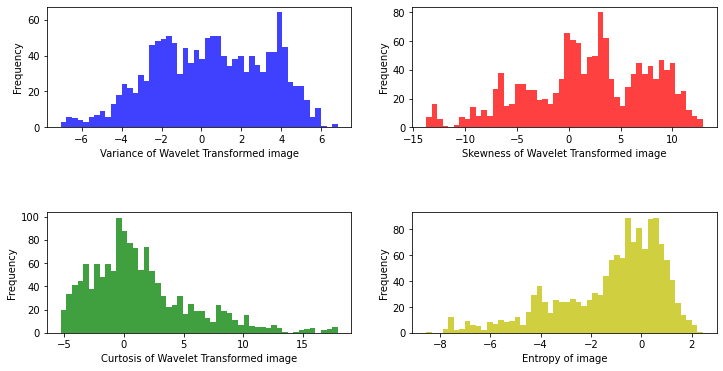

In [2]:
#Show distributions of dataset
#df_desc = df.iloc[:, :46]
#dataframe.plot.hist(column=[0], bins=50,figsize=(11,7)) # Plotting data distribution
#dataframe.plot.xlabel('variance of Wavelet Transformed image')

plt.figure(figsize = (12,6))
plt.subplots_adjust(hspace = 0.7) 
plt.subplot(221)
plt.hist(Data[:,0], 50, facecolor='b', alpha=0.75)
plt.xlabel('Variance of Wavelet Transformed image')
plt.ylabel('Frequency')


plt.subplot(222)
plt.hist(Data[:,1], 50, facecolor='r', alpha=0.75)
plt.xlabel('Skewness of Wavelet Transformed image')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(Data[:,2], 50, facecolor='g', alpha=0.75)
plt.xlabel('Curtosis of Wavelet Transformed image')
plt.ylabel('Frequency')


plt.subplot(224)
plt.hist(Data[:,3], 50, facecolor='y', alpha=0.75)
plt.xlabel('Entropy of image')
plt.ylabel('Frequency')
plt.show()
#df.boxplot() # Showing boxplots of features


Summary for the feature values of Banknote authentication dataset
                 0            1            2            3
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500


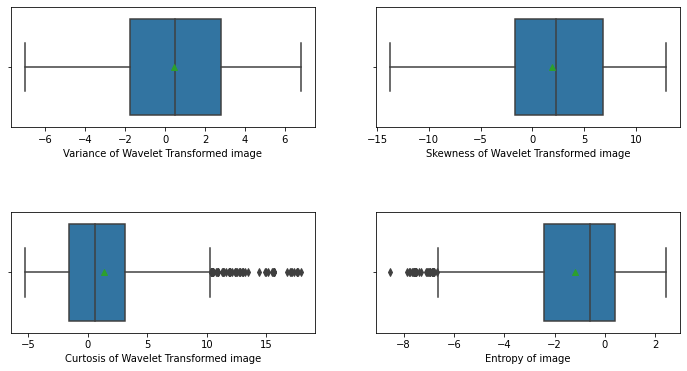

In [3]:
#Show boxplots for every feature
import seaborn as sns

feature_names = ['Variance of Wavelet Transformed image', 'Skewness of Wavelet Transformed image',
                'Curtosis of Wavelet Transformed image', 'Entropy of image']
def draw_boxplot(feature, df, feature_name):
    plt.subplot(2,2,(feature+1))
    ax = sns.boxplot(x=df[feature], showmeans=True)
    ax.set(xlabel=feature_name)
    new_df = pd.DataFrame(data=df)

    
plt.figure(figsize = (12,6))
plt.subplots_adjust(hspace = 0.7) 
for i in range(len(feature_names)):
    draw_boxplot(i, dataframe, feature_names[i])

print('Summary for the feature values of Banknote authentication dataset')
print(dataframe.describe())



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

#Feature selection
#Sequential forward selection
def select_best_features_SFS(Data, Labels, feature_names):
    knn = KNeighborsClassifier(n_neighbors=2)
    sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
    sfs.fit(Data, Labels)
    print('\nBest features: ', sfs.get_support())
    print('\nBest features: ', feature_names[sfs.get_support()])

#Sequential backward selection
def select_best_features_SBS(Data, Labels, feature_names):
    knn = KNeighborsClassifier(n_neighbors=2)
    sfs = SequentialFeatureSelector(knn, n_features_to_select=2, direction="backward")
    sfs.fit(Data, Labels)
    print('\nBest features: ', feature_names[sfs.get_support()])

feature_names = np.array(['Variance of Wavelet Transformed image', 'Skewness of Wavelet Transformed image', 
                 'Curtosis of Wavelet Transformed image', 'Entropy of image']);
select_best_features_SFS(Data, Labels, feature_names)

select_best_features_SBS(Data, Labels, feature_names)


Best features:  [ True  True False False]

Best features:  ['Variance of Wavelet Transformed image'
 'Skewness of Wavelet Transformed image']

Best features:  ['Variance of Wavelet Transformed image'
 'Skewness of Wavelet Transformed image']



 Confusion Matrix of K-nn:
[[240   1]
 [  0 171]]
K-nn accuracy:  0.9976
Error rate of K-nn - Hold-out protocol:  0.0024


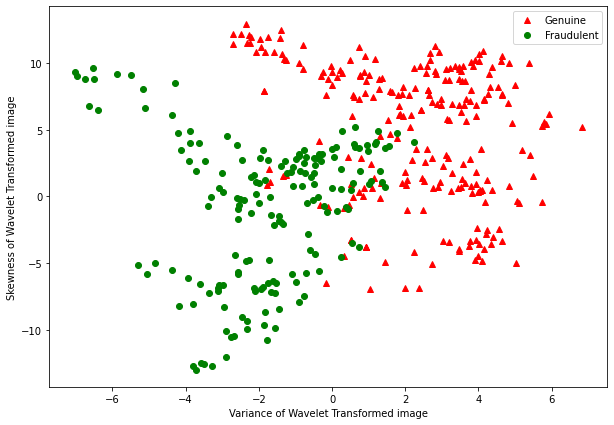

In [5]:
#Use k-nn classifier using the 2 best selected features 0 and 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_KNNC(Data, Labels, target_names):
    neigh = KNeighborsClassifier(n_neighbors=2)

    # Make a train/test split using 30% test size
    X_train, X_test, y_train, y_test = train_test_split(
        Data, Labels, test_size=0.30)
    neigh.fit(X_train, y_train)
    assigned_labels = neigh.predict(X_test)
    #print('AL: ', assigned_labels[0:10])
    #print('Xtest: ', X_test[0:10, [0,1]])
    #print('unique labels: ', target_names)
    e = np.mean(y_test != assigned_labels)
    conf_mat = confusion_matrix(y_test, assigned_labels)
    print('\n Confusion Matrix of K-nn:')
    print(conf_mat)
    print('K-nn accuracy: ', round(neigh.score(X_test, y_test),4))
    print('Error rate of K-nn - Hold-out protocol: ', round(e, 4))
    plt.figure(figsize=(10, 7))
    plt.plot(X_test[assigned_labels == 1,0],X_test[assigned_labels == 1,1],'r^')
    plt.plot(X_test[assigned_labels == 2,0],X_test[assigned_labels == 2,1],'go')
    plt.xlabel('Variance of Wavelet Transformed image')
    plt.ylabel('Skewness of Wavelet Transformed image')
    plt.legend(('Genuine','Fraudulent'))
    plt.show()

plot_KNNC(Data, Labels, feature_names)